# 5 Quantum Algorithms

### 5.1 Background

First, let's begin with simple, classical algorithms.

- **Standard Model**: a standard model of computation is a simple input (like a string of bits) and output system that can be used to describe any computation. The most common abstract model is the Turing machine, which is a theoretical construct that helps us understand the limits of what can be computed.


   <details>
   <summary>🧠 Details for nerds: Turing Machines.</summary>

   The Turing machine consists of an infinite tape divided into discrete cells and a read/write head that can move left or right to scan one of these cells at a time. It also consists of a finite set of states, a transition function that determines how the machine moves based on the current state and the symbol read from the tape, and a set of accepting states that indicate when the computation is complete. 

   Despite its simplicity, any algorithm you can run on a modern computer can also be encoded as a Turing machine program.
   </details>


- **Query model**: the query model of computation is a more abstract model that focuses on the interaction between a computation and an oracle. An oracle is a black box that can answer specific questions about a function, allowing the computation to access information without explicitly calculating it. 

    For example, the **OR** oracle takes an input $f: \Sigma^n \rightarrow \Sigma $ and produces an output $f(x) = 1$ if any of the inputs are 1, and $f(x) = 0$ otherwise.

   <details>
   <summary>🧠 Details for nerds: Query Model.</summary>

   In the query model, computations are allowed to make queries to an oracle. The input here is not a string, but rather a function $f: \Sigma^n \rightarrow \Sigma^m $ that itself takes an input $x$ and returns an output $f(x)$, where $n$ and $m$ are positive integers and $\Sigma = \{0, 1\}$. The oracle can be used to access information about the function without having to compute it directly. To say that a computation makes a query means that it evaluates the function $f$ once, and the result $f(x)$ is made available to the computation. We measure the efficiency of a computation in terms of the **number of queries** it makes to the oracle, which is often referred to as the query complexity of the computation.

   - It is worth noting that when we measure efficiency of query algorithms, we completely ignore the cost of implementing the oracle. This is because the oracle is assumed to be a black box, and we are only interested in how many queries it takes to solve a problem.
   </details>

  Sometimes, we can also consider query problems where we have a "promise", or a domain on the inputs. Inputs that do not satisfy this are not considered. For example, the **unique search oracle** is a query problem where the oracle is guaranteed to have a single unique solution $z \in \Sigma^n $ that evaluates to $f(z) = 1$ and $f(x) = 0$ for all other $x≠z$.

Another key consideration is **query gates**. For circuit models, all queries are implemented as gates, and for Boolean circuits, query gates compute the input function $f$ directly. For example, a NOT gate can be considered a query gate that computes the function $f(x) = \neg x$.

### 5.2 Quantum Queries
Now let's extrapolate these concepts to quantum circuits. For the quantum query model, we define our gates differently, in a manner that makes them **unitary** (meaning it is reversible without loss of probabilistic information). Due to this property, we cannot simply "erase" the input and replace it with output $f(x)$, and instead we extend the space to include an output qubit.

The query gate $Q_f$ for any function $f: \Sigma^n \rightarrow \Sigma^m$ is defined as:
$$ Q_f (|y \rangle |x \rangle) = |y \oplus f(x) \rangle |x \rangle $$
for all $x \in \Sigma^n$ and $y \in \Sigma^m$. Note that the string $ y \oplus f(x) $ is the bitwise XOR of the two strings, for example $001 \oplus 101 = 100$.
This is always unitary for any function $f$, and as a matrix is a permutation matrix (with only one entry that is 1 in each row and column, and all other entries are 0).




### 5.3 Deutsch's Algorithm
In 1985, David Deutsch introduced a problem that is now known as Deutsch's problem. The problem is a simple parity problem for functions of the form $f: \Sigma \rightarrow \Sigma$. In greater detail, there are four functions that can be defined:
- $f_0(x) = 0$ for all $x \in \{0, 1\}$.
- $f_1(x) = 1$ for all $x \in \{0, 1\}$.
- $f_2(x) = 0$ for $x = 0$ and $f_2(x) = 1$ for $x = 1$.
- $f_3(x) = 1$ for $x = 0$ and $f_3(x) = 0$ for $x = 1$.

The functions $f_0$ and $f_1$ are constant (output the same value for all inputs), while $f_2$ and $f_3$ are balanced (output 0 for one input and 1 for the other).
Now, the problem is to determine whether the function $f$ is constant or balanced. Every classical algorithm must make at least two queries to determine this with certainty, since learning just one of the outputs does not determine whether the function is constant or balanced.

Instead, Deutsch's algorithm which is a quantum algorithm can solve this problem with just one query. The algorithm works as follows:
- We have two qubits, one for the input and one for the output. We initialize the input qubit to $|0\rangle$ and the output qubit to $|1\rangle$. Thus, the initial state of the system is $|0\rangle |1\rangle$.
- We apply a Hadamard gate each to both qubits $H\lvert 0\rangle = \frac{\lvert 0\rangle + \lvert 1\rangle}{\sqrt{2}}, \quad
   H\lvert 1\rangle = \frac{\lvert 0\rangle - \lvert 1\rangle}{\sqrt{2}} = \lvert -\rangle $, which puts them into a superposition of states. So the joint state becomes: $\frac{1}{2}\sum_{x\in\{0,1\}} \lvert x\rangle(\lvert 0\rangle - \lvert 1\rangle)$.

- We then apply the query gate $Q_f: \lvert x\rangle\lvert y\rangle \mapsto \lvert x\rangle\lvert y \oplus f(x)\rangle$ to the system, which computes the function $f$ and updates the output qubit.  After this, the state is $\frac{1}{2}\sum_{x} (-1)^{f(x)} \lvert x\rangle (\lvert 0\rangle - \lvert 1\rangle)$.
- Next, we apply a Hadamard gate to the input qubit again. The Hadamard gate transforms the state of the input qubit into a superposition of states that encodes the parity of the function $f$. The state now becomes $\frac{1}{2}\sum_{x} (-1)^{f(x)} \lvert -\rangle$.
    - The function value has been kicked into a phase $(-1)^{f(x)}$, which means that if $f(x)$ is constant (either 0 or 1), the phase will be the same for both states. Thus, the output qubit is now "irrelevant".
- Finally, we apply another Hadamard gate to the input qubit and then measure this. 

If the function is constant, then $(-1)^{f(0)} = (-1)^{f(1)}$ and the output will be $|0\rangle$. If it is balanced, the output will be $|1\rangle$ since $(-1)^{f(0)} = -(-1)^{f(1)}$. This allows us to determine the type of function with just one query!

This works because of the interference between the two states caused by the Hadamard gates, and we effectively compute $f(0)$ and $f(1)$ at the same time, creating constructive interference for the "correct" answer and destructive interference for the "wrong" answer (hence we it isn't measured).

   <details>
   <summary>🧠 Details for nerds: Phase Kickback Phenomenon.</summary>

   The phase kickback phenomenon is a key feature of quantum computing that allows us to encode information in the phase of a quantum state.
   
   Consider the simple case where $b$ and $c$ are arbitrary binary values in $ | b \oplus c \rangle = X^c | b \rangle $. In short, performing XOR on $b$ and $c$ is equivalent to applying the Pauli-X gate to $b$ if $c = 1$, and leaving it unchanged if $c = 0$. So, if we apply the query gate $Q_f$ to the state $|b\rangle | a \rangle $, we get: $Q_f |b\rangle | a \rangle = |b \oplus f(a) \rangle |a \rangle  = (X^{f(a)}|b \rangle ) |a \rangle $. This works for all choices of $b$, thus works for any arbitray state $\Psi$: 

   $$ Q_f |\Psi \rangle | a \rangle = (X^{f(a)}|\Psi \rangle ) |a \rangle $$

   Consider $\Psi = |- \rangle $, i.e. the minus state. The reason phase kickback works is because applying $X | - \rangle $ always gives $- |- \rangle $.  ($-1$ times the minus state). Since the minus state is an eigenvector of the NOT operation with eigenvalue $-1$, we can say this is equivalent to:

   $$ Q_f (|- \rangle | a \rangle) = (-1)^{f(a)} | - \rangle |a \rangle $$

   </details>

### 5.4 Grover's Algorithm
First, we consider the problem of unstructured search, which is the problem of finding a specific item in an unsorted list. Suppose we're given a function $f: \Sigma^n \rightarrow \Sigma$ as an oracle. Our goal is to find a solution binary string $x \in \Sigma^n$ such that $f(x) = 1$. This is **unstructured** because $f$ is arbitrary and does not have any specific structure that we can exploit to find the solution more efficiently, so optimised solutions like binary search do not apply.

The total number of inputs to the function is $N = 2^n$, and we want to find a solution $x$ such that $f(x) = 1$. The classical case (deterministic) for this is to evaluate the function for each input $x$ one by one, which requires $N$ queries in the worst case. We can also use probabilistic algorithms which offer minor improvements, but they still require $O(N)$ queries in the worst case.

In contrast, Grover's algorithm is a quantum algorithm that can solve this problem with only $O(\sqrt{N})$ queries. Before we describe the algorithm, we need to define the concept of a **phase query gate**.

We assume that we have access to a function $f: \Sigma^n \rightarrow \Sigma$ through a query gate $Q_f : |a \rangle |x \rangle \mapsto |a \oplus f(x) \rangle |x \rangle$ for all $a \in \Sigma$ and $x \in \Sigma^n$. Then, a phase query gate for $f$ is defined as:
$$ Z_f : |x \rangle \mapsto (-1)^{f(x)} |x \rangle $$

Essentially, this gate applies a phase of $(-1)^{f(x)}$ to the state $|x\rangle$, which is similar to the phase kickback phenomenon we saw in Deutsch's algorithm. Now, Grover's algorithm works as follows:
1. **Initialization**: set $n$ qubits to the state $H^{\otimes n} |0^n\rangle = |\Psi_0 \rangle$, which is a uniform superposition of all possible inputs $x \in \Sigma^n$. Intuitively, at this point we know nothing about the function $f$ and have equal probability of measuring any input, hence the uniform superposition of all solutions.
2. **Iterate**: apply the Grover operation $G$ $t$ times.
    The Grover operation $G$ is defined as:
    $$ G = H^{\otimes n} Z_{OR} H^{\otimes n} Z_f $$
    Where $Z_f$ is the phase query gate for the function $f$, and $Z_{OR}$ is the phase query gate for the $n$-bit OR function. The actual circuit for this $G$ operation is shown in Figure 2 below.
3. **Measurement**: after $t$ iterations, measure the state, yielding a candidate solution $x$. We do not have a guarantee that this is the correct solution, but we can increase the probability of measuring a correct solution by increasing the number of iterations $t$.

Note that $t$ also represents the number of queries to the oracle, since each Grover operation $G$ requires one query to the function $f$ and one query to the OR function. A typical way to run Grover's algorithm is to choose a number of $t$ iterations, run this algorithm with the Grover operation $G$ applied $t$ times to get a candidate solution $x$, then check if $f(x) = 1$ to verify if the candidate solution is correct. If it is not, we can repeat the algorithm with a different number of iterations $t$ until we find a correct solution, or return that no solution exists if we exhaust all possibilities.

<details>
<summary>🧠 Details for nerds: Calculations behind .</summary>

We'll refer to the $n$ qubits being used for Grover's algorithm as a register $Q$. 
   
We wish to know what happens when $Q$ is initialised to the state $|\Psi_0 \rangle = H^{\otimes n} |0^n\rangle$ and the Grover operation $G$ is applied iteratively $t$ times.
$$ G = H^{\otimes n} Z_{OR} H^{\otimes n} Z_f $$

Given below are the sets of solutions and non-solutions:
- $A_1 = \{x \in \Sigma^n : f(x) = 1\}$, the set of solutions.
- $A_0 = \{x \in \Sigma^n : f(x) = 0\}$, the set of non-solutions.
We will be interested in uniform superpositions over these sets, which we denote as:
$$|A_0 \rangle = \frac{1}{\sqrt{|A_0|}} \sum_{x \in A_0} |x \rangle, \quad |A_1 \rangle = \frac{1}{\sqrt{|A_1|}} \sum_{x \in A_1} |x \rangle$$

The first register $Q$ is initialised to the state $|u \rangle = H^{\otimes n} |0^n\rangle = \frac{1}{\sqrt{N}} \sum_{x \in \Sigma^n} |x \rangle$. This state is contained in the subspace spanned by the states $|A_0 \rangle$ and $|A_1 \rangle$, which means we can write it as: $|u \rangle = \sqrt{\frac{|A_0|}{N}} |A_0 \rangle + \sqrt{\frac{|A_1|}{N}} |A_1 \rangle$. The state $Q$ remains in this subspace throughout the algorithm (after every application of $G$).

We can better understand the Grover operation $G$ by splitting it into two parts:
$$ G = (H^{\otimes n} Z_{OR} H^{\otimes n}) (Z_f) $$

Recall that the phase query gate $Z_f$ is defined as $Z_f |x \rangle = (-1)^{f(x)} |x \rangle$. Its action on $|A_0 \rangle$ and $|A_1 \rangle$ is:
- $Z_f |A_0 \rangle = |A_0 \rangle$, since $f(x) = 0$ for all $x \in A_0$.
- $Z_f |A_1 \rangle = -|A_1 \rangle$, since $f(x) = 1$ for all $x \in A_1$.

Next, the operation $Z_{OR}$ is defined as $Z_{OR} = 2 |0^n \rangle \langle 0^n | - I$. If we substitute this into the Grover operation, we get:
$$ G = (H^{\otimes n} Z_{OR} H^{\otimes n}) (Z_f)$$
$$ = (H^{\otimes n} (2 |0^n \rangle \langle 0^n | - I) H^{\otimes n}) (Z_f)$$
$$ = (2 |u \rangle \langle u | - I)(Z_f)$$

It turns out, when we perform this simplified operation on $|A_0 \rangle$ and $|A_1 \rangle$, we get:
- $G |A_0 \rangle = \frac{|A_0| - |A_1|}{N} |A_0 \rangle + \frac{2 \sqrt{|A_0| \cdot |A_1|}}{N} |A_1 \rangle $
- $G -\frac{2 \sqrt{|A_0| \cdot |A_1|}}{N} |A_0 \rangle + \frac{|A_0| - |A_1|}{N} |A_1 \rangle $

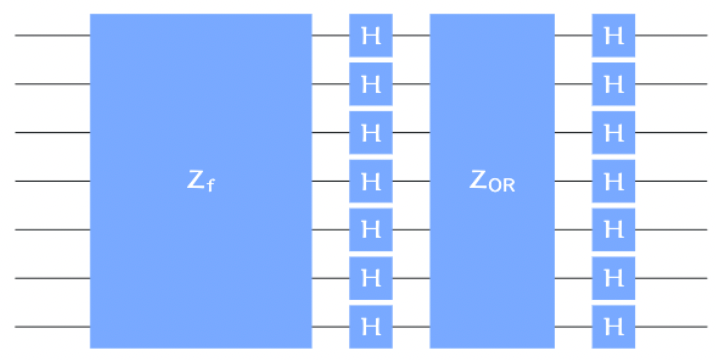

Figure 2: Grover's algorithm circuit diagram.